# Checking presidential corporate card (Brazil)
<pre>
Data Source https://www.gov.br/secretariageral/pt-br/acesso-a-informacao/informacoes-classificadas-e-desclassificadas/Planilha12003a2022.csv
</pre>

In [1]:
import pandas as pd
import plotly 
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter


In [2]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('R$', '').replace('.', '').replace(' ','').replace(',','.'))
    return(x)

In [3]:
# Read Presidential corporate card
df=pd.read_csv('Planilha12003a2022.csv.gz', sep=";", encoding="latin-1")[['DATA PGTO','VALOR']]
df = df.rename(columns={'DATA PGTO':'date','VALOR':'value'})


In [4]:
# Convert values to numbers
df['value']=df['value'].apply(clean_currency)
df=df[~df['value'].isna()]

try:
    df['value'] = pd.to_numeric(df['value']) 
except ValueError:
    # I want to register on my log the message recived on ORIGINAL VALUE
    mask = pd.to_numeric(df['value'], errors='coerce').isna() 
    #if possible missing values
    #mask = pd.to_numeric(df['ORIGINAL_VALUE'].fillna('0'), errors='coerce').isna() 
    L = df.loc[mask, 'value'].tolist()
    #print ("Not converted values are: " + ", ".join(L))
    #Not converted values are: Wrong format
    print(f"Ignoring not converted values are: {L}")
    
# Select Just numbers
df=df.loc[df["value"].str.contains("\d+")]
df['value']=pd.to_numeric(df['value'], errors='coerce').fillna(0, downcast='infer')
# convert date
df['date']=pd.to_datetime(df['date'],format='%d/%m/%Y')


Ignoring not converted values are: ['-']


# Presidential expenses by day

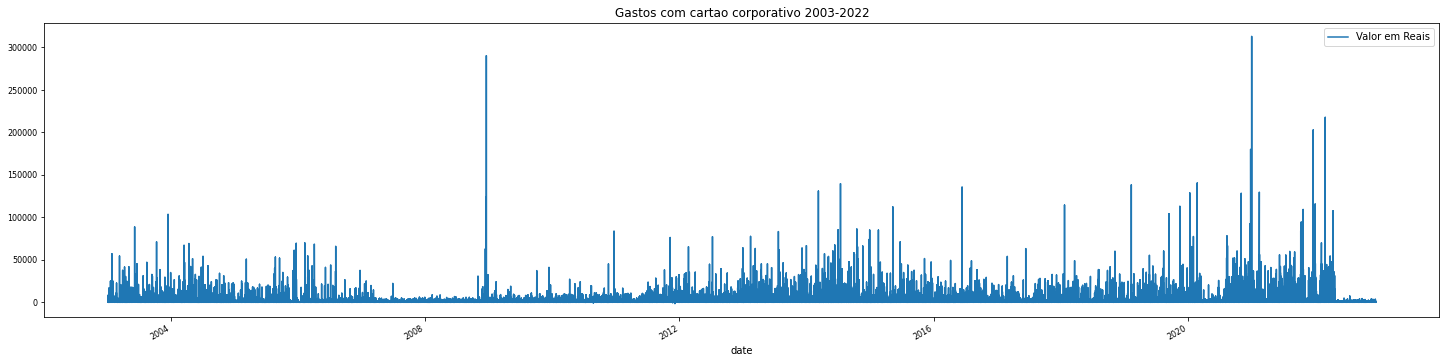

In [5]:
data=df.set_index('date')
fig, ax = plt.subplots()
data.plot(title="Gastos com cartao corporativo 2003-2022",figsize=(25, 6), fontsize=8, ax=ax)
ax.legend(["Valor em Reais"]);
fig.savefig('diario.png')

# Expenses by year

In [6]:
data = df.groupby(df.date.dt.year)['value'].agg(['sum'])

In [7]:
# Convert values to millions
data['sum'] /= 1000000

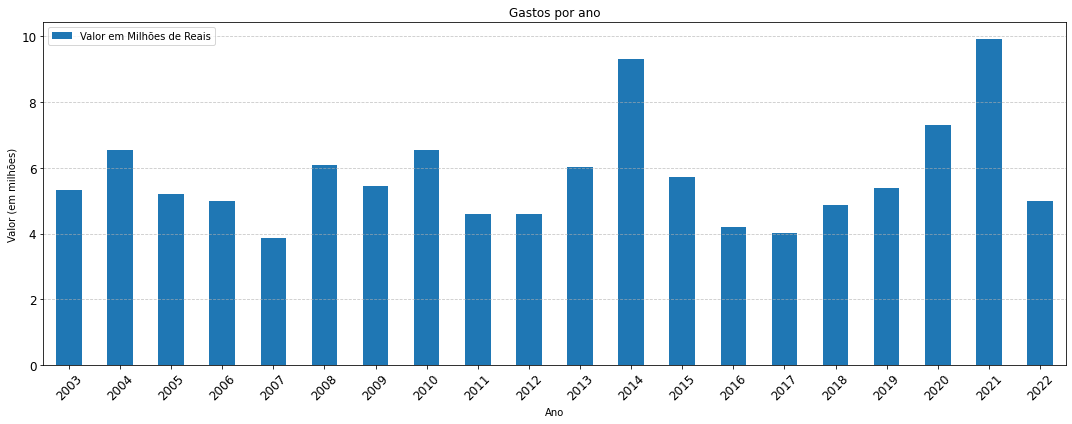

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(kind='bar', title="Gastos com cartao corporativo 2003-2022",figsize=(15, 6), fontsize=12, ax=ax)
ax.legend(["Valor em Milhões de Reais"]);
#data.plot(kind='bar', ax=ax)
plt.title('Gastos por ano')
plt.xlabel('Ano')
plt.ylabel('Valor (em milhões)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
fig.savefig('anual.png')